<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/PruebaK_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Números aleatorios generados:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]

Tabla de cálculos:
    i       X_i  i/n  |i/n - X_i|  |X_i - (i-1)/n|
0   1  0.058084  0.1     0.041916         0.058084
1   2  0.155995  0.2     0.044005         0.055995
2   3  0.156019  0.3     0.143981         0.043981
3   4  0.374540  0.4     0.025460         0.074540
4   5  0.598658  0.5     0.098658         0.198658
5   6  0.601115  0.6     0.001115         0.101115
6   7  0.708073  0.7     0.008073         0.108073
7   8  0.731994  0.8     0.068006         0.031994
8   9  0.866176  0.9     0.033824         0.066176
9  10  0.950714  1.0     0.049286         0.050714

Valor D máximo: 0.1987
Valor crítico D (α=0.05): 0.4092
Resultado: No se rechaza H0


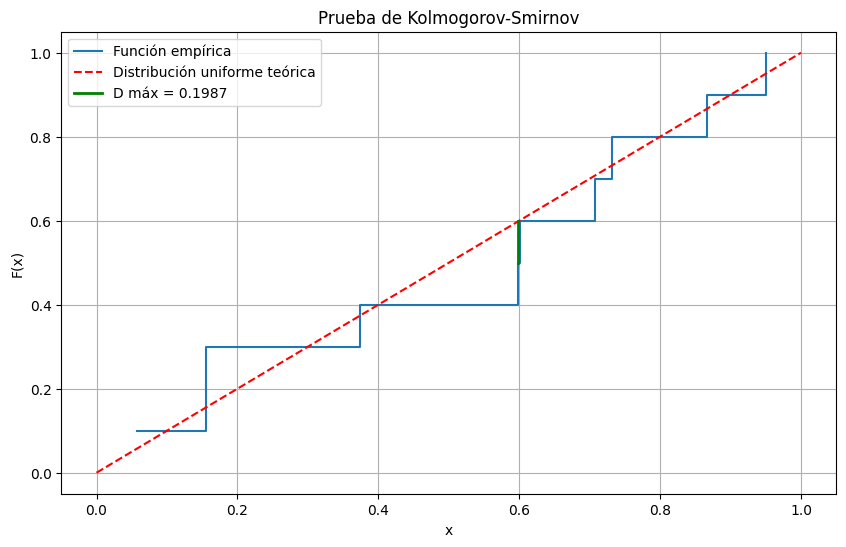

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def kolmogorov_smirnov_test(random_numbers):
    """
    Implementación de la prueba de Kolmogorov-Smirnov con valores absolutos

    Parámetros:
    random_numbers: Lista o array con los números aleatorios a analizar

    Retorna:
    DataFrame con la tabla de cálculos y el valor D máximo
    """
    # Convertir a array de numpy si no lo es
    x = np.array(random_numbers)

    # Ordenar los números de menor a mayor
    x_sorted = np.sort(x)

    # Tamaño de la muestra
    n = len(x_sorted)

    # Crear una lista con los índices (1, 2, ..., n)
    indices = np.arange(1, n + 1)

    # Calcular i/n
    i_div_n = indices / n

    # Calcular |i/n - X_i| (valor absoluto)
    diff1 = np.abs(i_div_n - x_sorted)

    # Calcular |X_i - (i-1)/n| (valor absoluto)
    i_minus_1_div_n = (indices - 1) / n
    diff2 = np.abs(x_sorted - i_minus_1_div_n)

    # Crear el DataFrame para la tabla
    table = pd.DataFrame({
        'i': indices,
        'X_i': x_sorted,
        'i/n': i_div_n,
        '|i/n - X_i|': diff1,
        '|X_i - (i-1)/n|': diff2
    })

    # Encontrar el valor D (máximo de las diferencias en valor absoluto)
    d_plus = np.max(diff2)
    d_minus = np.max(diff1)
    d = max(d_plus, d_minus)

    return table, d

def test_with_uniform_distribution(random_numbers, alpha=0.05):
    """
    Realiza la prueba KS comparando con una distribución uniforme

    Parámetros:
    random_numbers: Lista o array con los números aleatorios a analizar
    alpha: Nivel de significancia

    Retorna:
    Resultado de la prueba y valor crítico
    """
    n = len(random_numbers)
    table, d_max = kolmogorov_smirnov_test(random_numbers)

    # Valor crítico para la prueba KS con distribución uniforme al nivel alpha
    d_critico = stats.ksone.ppf(1 - alpha/2, n)

    # Resultado de la prueba
    resultado = "No se rechaza H0" if d_max <= d_critico else "Se rechaza H0"

    return table, d_max, d_critico, resultado

# Ejemplo de uso
if __name__ == "__main__":
    # Generar números aleatorios de ejemplo (distribución uniforme)
    np.random.seed(42)  # Para reproducibilidad
    numeros_aleatorios = np.random.uniform(0, 1, 10)

    print("Números aleatorios generados:")
    print(numeros_aleatorios)

    # Realizar la prueba
    tabla, d_max, d_critico, resultado = test_with_uniform_distribution(numeros_aleatorios)

    print("\nTabla de cálculos:")
    print(tabla)

    print(f"\nValor D máximo: {d_max:.4f}")
    print(f"Valor crítico D (α=0.05): {d_critico:.4f}")
    print(f"Resultado: {resultado}")

    # Visualización
    plt.figure(figsize=(10, 6))
    plt.step(tabla['X_i'], tabla['i/n'], where='post', label='Función empírica')
    x_line = np.linspace(0, 1, 100)
    plt.plot(x_line, x_line, 'r--', label='Distribución uniforme teórica')
    plt.title('Prueba de Kolmogorov-Smirnov')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.grid(True)

    # Marcar la diferencia máxima
    idx_max = np.argmax(np.maximum(tabla['|i/n - X_i|'], tabla['|X_i - (i-1)/n|']))
    plt.plot([tabla['X_i'][idx_max], tabla['X_i'][idx_max]],
             [tabla['X_i'][idx_max], tabla['i/n'][idx_max]],
             'g-', linewidth=2, label=f'D máx = {d_max:.4f}')
    plt.legend()

    plt.show()